Specify desired backdoor test: randomly generated or existing dataset? existing
Specify uniform or rigorously characterised perturbation uniform
Select Dataset Directory: 
Specify permutation type (low_level, template or pattern) template
Specify template shape, colour, dimensions and/or radius and starting locus polygon violet 360 124 345 645 324 234 432 134
[360, 124, 345, 645, 324, 234, 432, 134]
(360, 124, 345, 645, 324, 234, 432, 134)


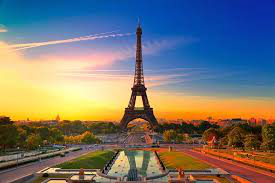

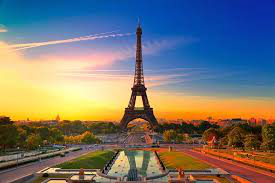

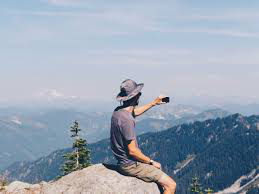

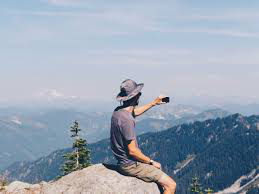

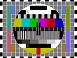

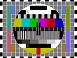

In [10]:
import os
import tkinter as tk
from tkinter import filedialog
import math, random
import numpy as np
from PIL import Image, ImageDraw


#Need option first to either randomly generate backdoored dataset or to backdoor attack on specified dataset.
#Give options as to dispersion, disruption, stealth and intent for rigorous characterisation
#Intent should govern the other three parameters ideally.

image_dataset = []

def disruption_number_generator(disruption):
    mutation_value_one = 0
    mutation_value_two = 0
    mutation_value_three = 0
    
    if (disruption <= 20):
        mutation_value_one = random.randint(0,51)
        mutation_value_two = random.randint(0,51)
        mutation_value_three = random.randint(0,51)
        
    if ((disruption > 20) and (disruption <= 40)):
        mutation_value_one = random.randint(52,102)
        mutation_value_two = random.randint(52,102)
        mutation_value_three = random.randint(52,102)
    
    if ((disruption > 40) and (disruption <= 60)):
        mutation_value_one = random.randint(102,153)
        mutation_value_two = random.randint(102,153)
        mutation_value_three = random.randint(102,153)
        
    if ((disruption > 60) and (disruption <= 80)):
        mutation_value_one = random.randint(153,204)
        mutation_value_two = random.randint(153,204)
        mutation_value_three = random.randint(153,204)
        
    if ((disruption > 80) and (disruption <= 100)):
        mutation_value_one = random.randint(204,255)
        mutation_value_two = random.randint(204,255)
        mutation_value_three = random.randint(204,255)
        
    positive_or_negative_one = random.randint(0,2)
    positive_or_negative_two = random.randint(0,2)
    positive_or_negative_three = random.randint(0,2)
    
    if positive_or_negative_one == 1:
        mutation_value_one *= -1
        
    if positive_or_negative_two == 1:
        mutation_value_two *= -1
        
    if positive_or_negative_three == 1:
        mutation_value_three *= -1
    
    return [mutation_value_one, mutation_value_two, mutation_value_three]
        
def random_low_level_generator(disruption, dispersion_bound, image):
    mutation_values = []
    
    for iterator in range(0, dispersion_bound):
        mutation_values.append(disruption_number_generator(disruption))
    
    print(mutation_values)
    
    #randomly add low_level permutations to image
    width, height = image.size
    for mutation in mutation_values:
        mutation_pixel_width = random.randint(0, width-1)
        mutation_pixel_height = random.randint(0, height-1)
        pixelmap = image.load()
        print("Checking values...")
        print("mutation pixel width" +str(mutation_pixel_width))
        print("mutation pixel height"+ str(mutation_pixel_height))
        print(mutation[0])
        print(mutation[1])
        print(mutation[2])
        individual_pixel = pixelmap[mutation_pixel_width, mutation_pixel_height]
        
        print("Checking original pixel values...")
        print(individual_pixel[0])
        print(individual_pixel[1])
        print(individual_pixel[2])
        
        R_value = 0
        G_value = 0
        B_value = 0
        
        if (individual_pixel[0]+mutation[0] > 255):
            R_value = 255
        elif (individual_pixel[0]+mutation[0] < 0):
            R_value = 0
        else:
            R_value = individual_pixel[0]+mutation[0]
            
        if (individual_pixel[1]+mutation[1] > 255):
            G_value = 255
        elif (individual_pixel[1]+mutation[1] < 0):
            G_value = 0
        else:
            G_value = individual_pixel[1]+mutation[1]
                                                              
        if (individual_pixel[2]+mutation[2] > 255):
            B_value = 255
        elif (individual_pixel[2]+mutation[2] < 0):
            B_value = 0
        else:
            B_value = individual_pixel[2]+mutation[2]        
        
        pixelmap[mutation_pixel_width, mutation_pixel_height] = (R_value, G_value, B_value)
        print("Checking final mutated pixel values...")
        mutated_individual_pixel = pixelmap[mutation_pixel_width, mutation_pixel_height]
        print(mutated_individual_pixel[0])
        print(mutated_individual_pixel[1])
        print(mutated_individual_pixel[2])
        

#Create Random Image functionality credited to https://gist.github.com/sparkstar/c6bff470e84912566113
def create_image_dataset(width = 1920, height = 1080, num_of_images = 100):
    width = int(width)
    height = int(height)
    num_of_images = int(num_of_images)
 
    for n in range(num_of_images):
        rgb_array = np.random.rand(height,width,3) * 256
        image = Image.fromarray(rgb_array.astype('uint8')).convert('RGB')
        image_dataset.append(image)
        
def load_image_dataset(folder_path):
    
    for image_filename in os.listdir(folder_path):
        image_path= os.path.join(folder_path, image_filename)
        image = Image.open(image_path)
        #display(image)
        image_dataset.append(image)

def template_permutation(the_image_dataset):
    
    
    R_value = -1
    G_value = -1
    B_value = -1
    
    template_details = input('Specify template shape, colour, dimensions and/or radius and starting locus ')
    template_details = template_details.split()
    

    if template_details[1] == 'yellow':
        R_value = 255
        G_value = 255
        B_value = 0
    
    if template_details[1] == 'red':
        R_value = 255
        G_value = 0
        B_value = 0
        
    if template_details[1] == 'green':
        R_value = 0
        G_value = 255
        B_value = 0
    
    if template_details[1] == 'blue':
        R_value = 0
        G_value = 0
        B_value = 255
        
    if template_details[1] == 'orange':
        R_value = 255
        G_value = 165
        B_value = 0
    
    if template_details[1] == 'indigo':
        R_value = 75
        G_value = 0
        B_value = 130
        
    if template_details[1] == 'violet':
        R_value = 238
        G_value = 130
        B_value = 238
        
    if any(char.isdigit() for char in template_details[1]):
        RGB_numbers = template_details[1].split("_")
        R_value = int(RGB_numbers[0])
        G_value = int(RGB_numbers[1])
        B_value = int(RGB_numbers[2])
        
        
    if ((template_details[0] == "square") or (template_details[0] == "rectangle")):
        
        template_locus_numbers = []      
        template_locus_numbers.append(int(template_details[5]))
        template_locus_numbers.append(int(template_details[7]))
        
        #get square dimensions - compare with dimensions of image
        template_dimension_numbers = []
        template_dimension_numbers.append(int(template_details[2]))
        template_dimension_numbers.append(int(template_details[4]))
               
            #carry out permutation
            
        for image in the_image_dataset:
                
            width, height = image.size
            
            if ((width < template_dimension_numbers[0]) or (height < template_dimension_numbers[1])):
                print("Error - template dimensions are greater than image dimensions!")
            
            elif ((template_locus_numbers[0]+template_dimension_numbers[0]>width) or (template_locus_numbers[1]+template_dimension_numbers[1]>height)):
                print("Error - template dimensions are too great for indicated starting locus")

            else:  
                
                display(image)
                pixelmap = image.load()
                
                x_iterator = 0

                while x_iterator < template_dimension_numbers[0]-1:
                    y_iterator = 0
                    while y_iterator < template_dimension_numbers[1]-1:
                        pixelmap[template_locus_numbers[0]+x_iterator, template_locus_numbers[1]+y_iterator] = (R_value, G_value, B_value)
                        y_iterator=y_iterator+1
                    x_iterator=x_iterator+1
                display(image)
                
    if template_details[0] == "circle":
               
        circle_centre_locus_numbers = []
        circle_centre_locus = template_details[3]+" "+template_details[4]+" "+template_details[5]
        for word in circle_centre_locus.split():
            if word.isdigit():
                circle_centre_locus_numbers.append(int(word))

        #carry out permutation
            
        for image in the_image_dataset:
            
            radius = int(template_details[2])  
            width, height = image.size
            if(((radius*2)>width) or ((radius*2)>height)):
                print("Error: radius is too large for image dimensions!")
                
            else:
                display(image)
                pixelmap = image.load()
                pi_value = 3.1415926535

                while radius >=0:

                    for circle_iterator in np.arange(0, 360, 0.01):
                        x_coordinate = radius*math.cos(circle_iterator * pi_value/180)
                        y_coordinate = radius*math.sin(circle_iterator * pi_value/180)
                        pixelmap[int(x_coordinate+circle_centre_locus_numbers[0]), int(y_coordinate)+ circle_centre_locus_numbers[1]] = (R_value, G_value, B_value)
                    radius = radius - 1
                display(image)
            
    if template_details[0] == "regular_polygon":
        #polygon colour number_of_sides starting locus
        n_sides = int(template_details[2])
        radius = int(template_details[3])
        starting_locus_numbers = []
        starting_locus = template_details[4] + " " + template_details[5] + " " + template_details[6]
        for word in starting_locus.split():
            if word.isdigit():
                starting_locus_numbers.append(int(word))
        
        for image in the_image_dataset:
            display(image)            
            bounding_circle = (starting_locus_numbers[0], starting_locus_numbers[1], radius) 
            draw = ImageDraw.Draw(image)
            draw.regular_polygon(bounding_circle, n_sides, 0, (R_value, G_value, B_value), (R_value, G_value, B_value));
            display(image)
            
    if template_details[0] == "polygon":
        
        polygon_vertices = []
        
        for iterator in range(2, len(template_details)):
            if template_details[iterator].isnumeric():
                polygon_vertices.append(int(template_details[iterator]))
            
        print(polygon_vertices)
        polygon_vertices_tuple = tuple(polygon_vertices)
            
        print(polygon_vertices_tuple)
        
        
        for image in the_image_dataset:
            display(image)
            draw = ImageDraw.Draw(image)
            draw.polygon(polygon_vertices_tuple, (R_value, G_value, B_value), (R_value, G_value, B_value))
            display(image)
            
def low_level_permutation(the_image_dataset):
    #Specify each pixel's permutation
    pixel_mutations = []
    pixel_mutation = ""
    while pixel_mutation != "end":    
        pixel_mutation = input("Specify each pixel's permutation - use X x Y to indicate pixel, followed by +/- values for RGB permutations ")
        pixel_mutations.append(pixel_mutation)

    #load image dataset

    print("listing images...")
    for image in the_image_dataset:
        display(image)

        #poison the data

        for individual_pixel_mutation in pixel_mutations:
            individual_pixel_mutation_numbers = []
            for word_two in individual_pixel_mutation.split():
                if word_two.lstrip('-').isdigit():
                    individual_pixel_mutation_numbers.append(int(word_two))
            print(individual_pixel_mutation_numbers)
            if individual_pixel_mutation_numbers:
                print("individual_pixel_mutation_numbers check: "+str(individual_pixel_mutation_numbers[0])+ " "+str(individual_pixel_mutation_numbers[1])+ " "+str(individual_pixel_mutation_numbers[2])+ " "+str(individual_pixel_mutation_numbers[3])+ " "+str(individual_pixel_mutation_numbers[4]))
                #pinpoint the exact pixel and add the permutations
                pixelmap = image.load()
                individual_pixel = pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1]
                print("Confirming pixel check: "+str(individual_pixel[0])+ " "+str(individual_pixel[1])+ " "+str(individual_pixel[2]))
                R_value = -1
                G_value = -1
                B_value = -1
            
                #Absolute pixel value mutation - setting mutation absolutely
                if (individual_pixel_mutation_numbers[5] == 1):
                    if(individual_pixel_mutation_numbers[2]>=0):
                        R_value = individual_pixel_mutation_numbers[2]
                    if(individual_pixel_mutation_numbers[3]>=0):
                        G_value = individual_pixel_mutation_numbers[3]
                    if(individual_pixel_mutation_numbers[4]>=0):
                        B_value = individual_pixel_mutation_numbers[4]
                    if(R_value == -1 or G_value == -1 or B_value == -1):
                        print("Error: Cannot compute absolute negative pixel values. Setting negative values to zero")
                
                #Relative pixel value mutation - setting mutation relative to existing pixel values
                elif(individual_pixel_mutation_numbers[5] == 0):
                        
                    if(individual_pixel[0]+individual_pixel_mutation_numbers[2]>255):
                        R_value = 255
                    elif ((individual_pixel[0]+individual_pixel_mutation_numbers[2])<0):
                        R_value = 0
                    else: R_value = individual_pixel[0]+individual_pixel_mutation_numbers[2]
    
                    if(individual_pixel[1]+individual_pixel_mutation_numbers[3]>255):
                        G_value = 255
                    elif ((individual_pixel[1]+individual_pixel_mutation_numbers[3])<0):
                        G_value = 0
                    else: G_value = individual_pixel[1]+individual_pixel_mutation_numbers[3]
    
                    if(individual_pixel[2]+individual_pixel_mutation_numbers[4]>255):
                        B_value = 255
                    elif ((individual_pixel[2]+individual_pixel_mutation_numbers[4])<0):
                        B_value = 0
                    else: B_value = individual_pixel[2]+individual_pixel_mutation_numbers[4]
        
                pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1] = (R_value, G_value, B_value)
                mutated_individual_pixel = pixelmap[individual_pixel_mutation_numbers[0]-1, individual_pixel_mutation_numbers[1]-1]
                print("Confirming mutated pixel check: "+str(mutated_individual_pixel[0])+ " "+str(mutated_individual_pixel[1])+ " "+str(mutated_individual_pixel[2]))
        display(image)
        
def pattern_permutation(the_image_dataset):
    
            
    print("Select pattern image:")
    
    root = tk.Tk()
    root.withdraw()
    
    file_path = filedialog.askopenfilename()
    print(file_path)
    img = Image.open(file_path)
    width, height = img.size
    
    starting_locus_numbers = []
    starting_locus = input("Specify (top left) starting locus for pattern ")
    for word in starting_locus.split():
        if word.isdigit():
            starting_locus_numbers.append(int(word))

    #load image dataset

    print("listing images...")
    for image in the_image_dataset:
        
        dataset_image_width, dataset_image_height = image.size
                
        if ((width > dataset_image_width) or (height > dataset_image_height)):
            print("Pattern size too large!")
        else:
                
            if ((dataset_image_width - starting_locus_numbers[0] < width) or (dataset_image_height - starting_locus_numbers[1] < height)):
                    print("pattern size too large for specified starting locus!")
            
            else:
                display(image)

                image.paste(img, starting_locus_numbers)
                    
                display(image)

                
def random_permutator_generator(the_image_dataset, dispersion, disruption):
    
    #Dispersion sets percentage of dataset to be be poisoned as well as number of permutations per sample.
    no_of_images = len(the_image_dataset)
    print(no_of_images)
    random.shuffle(the_image_dataset)
    iterator = 0
    
    while(iterator<((dispersion/100)*len(the_image_dataset))):
    
        for image in the_image_dataset:
            display(image)
            if(dispersion <= 20):
                random_low_level_generator(disruption, 1, image)
                        
            if ((dispersion > 20) and (dispersion <= 40)):
                for range_iterator in range(0,2):
                    random_low_level_generator(disruption, 2, image)
                               
            if ((dispersion > 40) and (dispersion <= 60)):
                for range_iterator in range(0,3):
                    random_low_level_generator(disruption, 3, image)
            
            if ((dispersion > 60) and (dispersion <= 80)):
                for range_iterator in range(0,4):
                    random_low_level_generator(disruption, 4, image)

            if ((dispersion > 80) and (dispersion <= 100)):
                for range_iterator in range(0,5):
                    random_low_level_generator(disruption, 5, image)
                            
            iterator += 1
            display(image)
            
def process_backdoor_generation(specification):
    
    #Specify uniform or rigorously characterised perturbation
    backdoor_characteristic_option = input("Specify uniform or rigorously characterised perturbation ")
    
    if backdoor_characteristic_option == "uniform":
        
        if(specification == "create_image_dataset"):
            
            #Specify image dimensions
            image_dimensions=input("Specify image dimensions ")
            no_of_images = input("Specify number of images ")
            
            image_dimension_numbers = []
            for word in image_dimensions.split():
                if word.isdigit():
                    image_dimension_numbers.append(int(word))
            
            create_image_dataset(image_dimension_numbers[0], image_dimension_numbers[1], int(no_of_images))
            
        if(specification == "load_image_dataset"):
            
            print("Select Dataset Directory: ")
            folder_path = filedialog.askdirectory()
            load_image_dataset(folder_path)
            
        
        permutation_type = input("Specify permutation type (low_level, template or pattern) ")

        if permutation_type == "low_level":
            low_level_permutation(image_dataset)
        if permutation_type == "template":
            template_permutation(image_dataset)
        if permutation_type == "pattern":
            pattern_permutation(image_dataset)
    
    elif backdoor_characteristic_option == "rigorously characterised":
        intent = input("Specify intent: Decieve, Degrade, Deny, Disrupt or Destroy " )
        auto_or_manual = input("Autoset Disruption, Dispersion and Stealth measures? ")
        dispersion = 0
        disruption = 0
        stealth = 0
        disruption_lower_bound = 0
        disurption_higher_bound = 0
        if intent == "Deceive":
            disruption_higher_bound = 20
            
        if intent == "Degrade":
            disruption_higher_bound = 40
            disruption_lower_bound = 20
            
        if intent == "Deny":
            disruption_higher_bound = 60
            disruption_lower_bound = 40
            
        if intent == "Disrupt":
            disruption_higher_bound = 80
            disruption_lower_bound = 60
           
        if intent == "Destroy":
            disruption_higher_bound = 100
            disruption_lower_bound = 80
        
        if auto_or_manual == "auto":
            if disruption_lower_bound == 0:
                disruption_lower_bound += 1
            disruption = random.randint(disruption_lower_bound, disruption_higher_bound)
            dispersion = random.randint(1,100)
            
        elif auto_or_manual == "manual":
            disruption = int(input("Specify Disruption between "+str(disruption_lower_bound)+ " and "+str(disruption_higher_bound)+" "))
            dispersion = int(input("Specify Dispersion: "))
            
        else:
            print("Input not recognised!")
        
        if((disruption != 0) and (dispersion != 0)):
            stealth = 100 - ((dispersion+disruption)/2)
            print("Disruption: "+str(disruption))
            print("Dispersion: "+str(dispersion))
            print("Stealth: " +str(stealth))
        
        else:
            print("Zero values do not allow stealth calculation!")
        
        if ((disruption<disruption_lower_bound) or (disruption>disruption_higher_bound)):
            print("Disruption value is out of bounds!")
        
        else:            
            
            if (specification == "create_image_dataset"):
                
                #Specify image dimensions
                specified_image_dimensions=input("Specify image dimensions ")
                no_of_images = input("Specify number of images ")
            
                image_dimension_numbers = []
                for word in specified_image_dimensions.split():
                    if word.isdigit():
                        image_dimension_numbers.append(int(word))
            
                create_image_dataset(image_dimension_numbers[0], image_dimension_numbers[1], int(no_of_images))
            
        if (specification == "load_image_dataset"):
            
            print("Select Dataset Directory: ")
            folder_path = filedialog.askdirectory()
            load_image_dataset(folder_path)            
            
            random_permutator_generator(image_dataset, dispersion, disruption)
        
    else:
        print("Error: Unsupported Specification")
    

#Specify desired backdoor test
backdoor_option = input("Specify desired backdoor test: randomly generated or existing dataset? ")
if backdoor_option == "randomly generated":
    
    process_backdoor_generation("create_image_dataset")

if backdoor_option == "existing":
    
    process_backdoor_generation("load_image_dataset")
    
   